## Classic Activation Functions

### Step function

The activation function known as the step or threshold function is a basic one. In 1943, McCulloch and Pitts introduced the original perceptron and used a step activation function, which is represented by the following equation:
 
$$
f(x) =
  \begin{cases}
    1       & \quad \text{if } x > \theta \\
    0       & \quad \text{if } x \leq \theta
  \end{cases} 
$$

 This function outputs a value of 1.0 for input values that are greater than or equal to the threshold value (𝜃), and 0 for all other values. This type of function, also referred to as a threshold function, only returns a value of 1 (true) when the input value is above the specified threshold, as shown in the figure below.

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


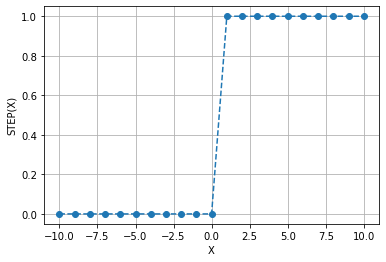

In [17]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 11, 1)
print(x)
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

### Sigmoid or Logistic Activation Function


The sigmoid non-linearity can be expressed in the following equation.

$$ \sigma (x) =  \frac{1}{1 + e^ \left(-x \right)} $$ 

The sigmoid function compresses a real number into a range from 0 to 1, making it useful for models that require probability predictions. This is because probabilities only exist between 0 and 1. The function maps large negative numbers to 0 and large positive numbers to 1, but it has some drawbacks. One is the vanishing gradient problem, where the prediction hardly changes for very high or low input values, which can slow down or prevent learning. Another issue is that the outputs are not centered around zero. Finally, the sigmoid function is computationally expensive. Historically, the sigmoid function has been widely used, but it has fallen out of favor recently. The function's curve resembles an S-shape.


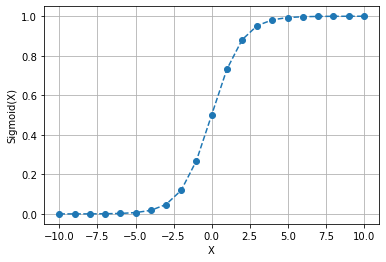

In [18]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

### Tanh


The hyperbolic tangent function is commonly used as an activation function in neural networks that require output values within the range of -1 to 1. The function is represented by the equation for the hyperbolic tangent (tanh) function.:

$$ 
\begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split}                  
$$

Similar to the sigmoid neuron, the activations of the tanh neuron also saturate, but unlike the sigmoid neuron, its output is centered around zero. Hence, in practical applications, the tanh non-linearity is generally preferred over the sigmoid non-linearity. It's worth noting that the tanh neuron is a scaled version of the sigmoid neuron, and the following equation describes the relationship between them:
$$ tanh(x) = 2 \sigma \left( 2x \right) -1 $$

the vaniRegarding the Tanh function, it is computationally demanding and also suffers from the saturation problem, which leads to shing gradient issue. Specifically, when the neuron output reaches the minimum or maximum values of its range (-1 and 1, respectively), the derivative of the function becomes zero.

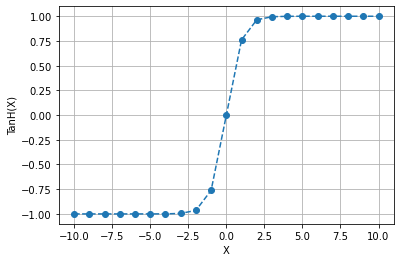

In [19]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

### Rectified Linear Units (ReLU)

The Rectified Linear Unit (ReLU), introduced by Teh & Hinton in 2001, has gained popularity in recent years. It is represented by a simple equation, as shown below:

$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} 
$$

Using ReLUs in neural networks has both advantages and disadvantages. On the positive side, ReLUs have been found to significantly speed up convergence of stochastic gradient descent (for instance, by a factor of 6 in the case of the ImageNet dataset), compared to sigmoid and tanh functions. This is attributed to the linear, non-saturating nature of the ReLU function. Additionally, ReLUs can be implemented easily by setting a threshold at zero, without requiring computationally expensive operations like exponentials. However, a major drawback of ReLUs is that they set all negative input values to zero, which can result in reduced model fitting and training performance. This is because the negative values are not appropriately mapped by the resulting graph.



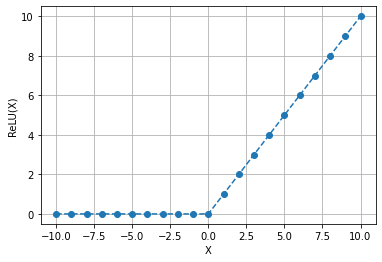

In [20]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

### ELU Function
The Exponential Linear Unit (ELU) is an activation function that is widely used in neural networks and shares similarities with other activation functions such as sigmoid and ReLU. However, it also has some distinctive characteristics that set it apart.

The ELU function is described by the following equation:
$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x > 0 \\
    ∝(e^x-1)       & \quad \text{if } x < 0
  \end{cases} 
$$

Where alpha is a small positive constant that is usually set to 1. This function provides a smooth and continuous transition from negative to positive values. It is similar to the ReLU function for positive inputs, but it has a non-zero output for negative inputs, which can help to prevent "dead" neurons.


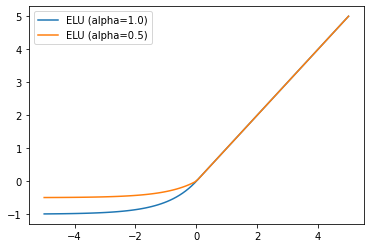

In [24]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.where(x > 0, x, 1.0 * (np.exp(x) - 1)), label="ELU (alpha=1.0)")
plt.plot(x, np.where(x > 0, x, 0.5 * (np.exp(x) - 1)), label="ELU (alpha=0.5)")

plt.legend()
plt.show()

### Selu Function

The Scaled Exponential Linear Unit (SELU) is an activation function that is specifically designed for use in deep neural networks. It is a variant of the Exponential Linear Unit (ELU) function and was proposed by Klambauer et al. in 2017.

The SELU function can be expressed mathematically as follows:

$$ f(x) = \lambda
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha(e^x -1)       & \quad \text{if } x < 0
  \end{cases} $$
  
In the SELU function, alpha is a small positive constant (usually set to 1.67326), and the scale is a normalization constant that is determined by the input distribution of the activation function. The normalization constant is calculated by scaling the variance of the input to be 1, and the mean to be 0. This step is essential for stabilizing the output of the network during training.

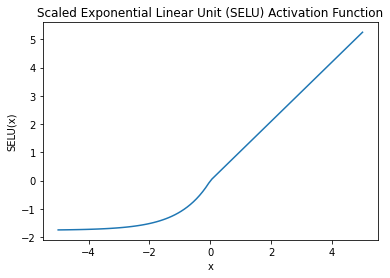

In [22]:
x = np.linspace(-5, 5, 100)
plt.plot(x, 1.0507 * np.where(x > 0, x, 1.67326 * (np.exp(x) - 1)))

plt.xlabel("x")
plt.ylabel("SELU(x)")
plt.title("Scaled Exponential Linear Unit (SELU) Activation Function")
plt.show()